## Abalone

This is a problem about Abalone...but not really. You should be able to use common knowledge to work with the data in this problem.

```
Description of fields in abalone data.

Name            Data Type    Meas.    Description
----            ---------    -----    -----------
Sex             nominal               M, F, and I (infant)
Length          continuous    mm      Longest shell measurement
Diameter        continuous    mm      perpendicular to length
Height          continuous    mm      with meat in shell
Whole weight    continuous    grams   whole abalone
Shucked weight  continuous    grams   weight of meat
Viscera weight  continuous    grams   gut weight (after bleeding)
Shell weight    continuous    grams   after being dried
Rings           integer               +1.5 gives the age in years
```

The target variable is Rings because it is a predictor of age. You can take this as your problem, "How do we estimate the age of an abalone from the available data?"

At a high level you have:

1. Question/Problem
2. ETL
3. EDA
4. Statistical and Mathematical Modeling.


**Begin**

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time


sns.set(style="whitegrid")

In [2]:
abalone = pd.read_csv('abalone.original(2).csv', names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 
                     'viscera_weight', 'shell_weight', 'rings'])

Checking data types of the data

In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null int64
diameter          4177 non-null int64
height            4177 non-null int64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


All look fine, but I want to double check the variable sex to make sure there are no surprises and that values are M, F or I

In [4]:
abalone.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

It seems to be fine. No other unexpected values. 

Let's get some descriptive statistics on the numerical variables

In [5]:
abalone.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


In [6]:
np.std(abalone)/np.mean(abalone)*100

length            22.916097
diameter          24.327665
height            29.976440
whole_weight      59.165605
shucked_weight    61.757500
viscera_weight    60.689373
shell_weight      58.278066
rings             32.453045
dtype: float64

I'll try a bar graph for the sex variable. 

I'll group the weight related variables since the same type of graph should work for all those variables. I'll start with a box plot for those. Whole weight max value seems a little high compared to the rest of the data so a box plot might not be the best fit.

The variables length, diameter and height might also work with a box plot or a histogram. The height variable might be a little tricky to visualize because that the max value is quite large compared to the rest of the data. 

I'll try a couple of different graphs for rings since according to the description adding 1.5 should give me the age of the abalone.

#### Univariate 

I'll start with a description of each variable and a a graph/chart that I think might be a good fit depending on description. If the graph/chart is not very helpful then I'll either try a different graph or move on to the next variable if I don't consider it important to the question. 

In [7]:
sex_counts = abalone.sex.value_counts()
abalone.sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: sex, dtype: object

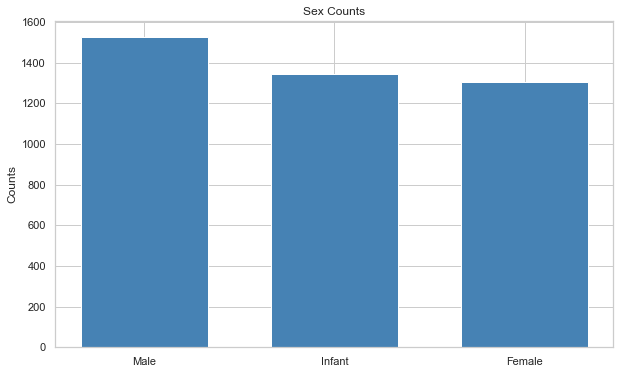

In [8]:
x = range(len(sex_counts))
width = 1/1.5
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1,1,1)
axes.bar(x, sex_counts, width, color='steelblue', align = 'center')
axes.set_xticks([0, 1, 2])
axes.set_xticklabels(['Male', 'Infant', 'Female'])
axes.set_title( "Sex Counts")
axes.set_ylabel( "Counts")
plt.show()

Since we are trying to find out how to determine the age of abalone, the only way this graph helps is to get an idea on the number of infants we should expect. I expect a bivariate analysis of this variable with the Rings variable to be informative to answer our question.

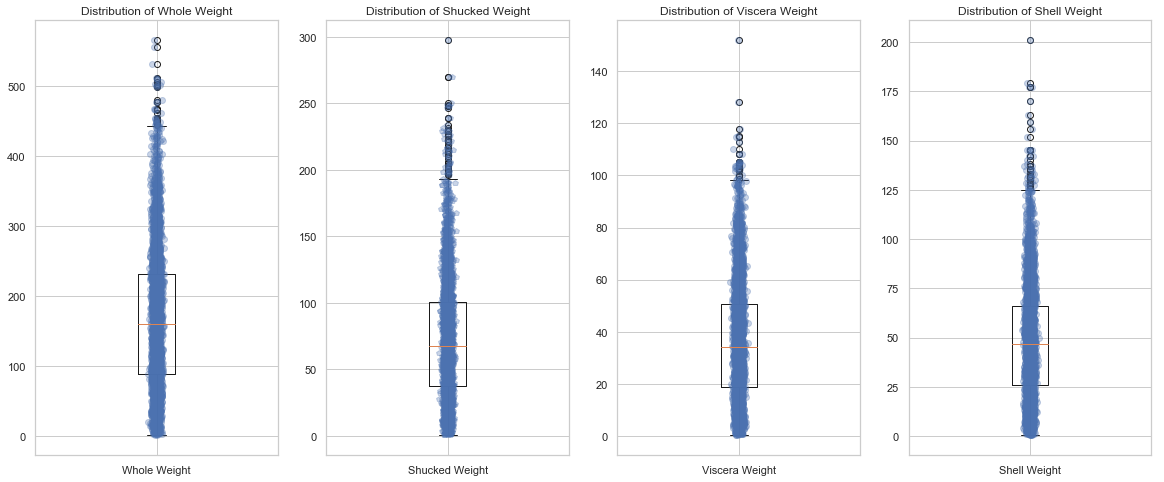

In [9]:
## Whole weight
figure = plt.figure(figsize= (20,8))
axes = figure.add_subplot(1, 4, 1)
patch = axes.boxplot(abalone['whole_weight'], labels=["Whole Weight"], patch_artist=False)
x = np.random.normal(1, 0.01, size=len(abalone['whole_weight']))
axes.plot(x, abalone['whole_weight'], 'o', alpha=0.3)
axes.set_title('Distribution of Whole Weight')

## Shucked Weight
axes = figure.add_subplot(1, 4, 2)
patch = axes.boxplot(abalone['shucked_weight'], labels=["Shucked Weight"], patch_artist=False)
x = np.random.normal(1, 0.01, size=len(abalone['shucked_weight']))
axes.plot(x, abalone['shucked_weight'], 'p', alpha=0.3)
axes.set_title('Distribution of Shucked Weight')

## Viscera Weight                             
axes = figure.add_subplot(1, 4, 3)
patch = axes.boxplot(abalone['viscera_weight'], labels=["Viscera Weight"], patch_artist=False)
x = np.random.normal(1, 0.01, size=len(abalone['viscera_weight']))
axes.plot(x, abalone['viscera_weight'], 'o', alpha=0.3)
axes.set_title('Distribution of Viscera Weight')
                             
## Shell Weight                             
axes = figure.add_subplot(1, 4, 4)
patch = axes.boxplot(abalone['shell_weight'], labels=["Shell Weight"], patch_artist=False)
x = np.random.normal(1, 0.01, size=len(abalone['shell_weight']))
axes.plot(x, abalone['shell_weight'], 'o', alpha=0.3)
axes.set_title('Distribution of Shell Weight')

plt.show()


We get an idea of the descriptive stats graphically but it looks a little crowded so let's try a bar graph. 

In [10]:
whole_weight_counts = abalone.whole_weight.value_counts()
shucked_weight_counts = abalone.shucked_weight.value_counts()
viscera_weight_counts = abalone.viscera_weight.value_counts()
shell_weight_counts = abalone.shell_weight.value_counts()

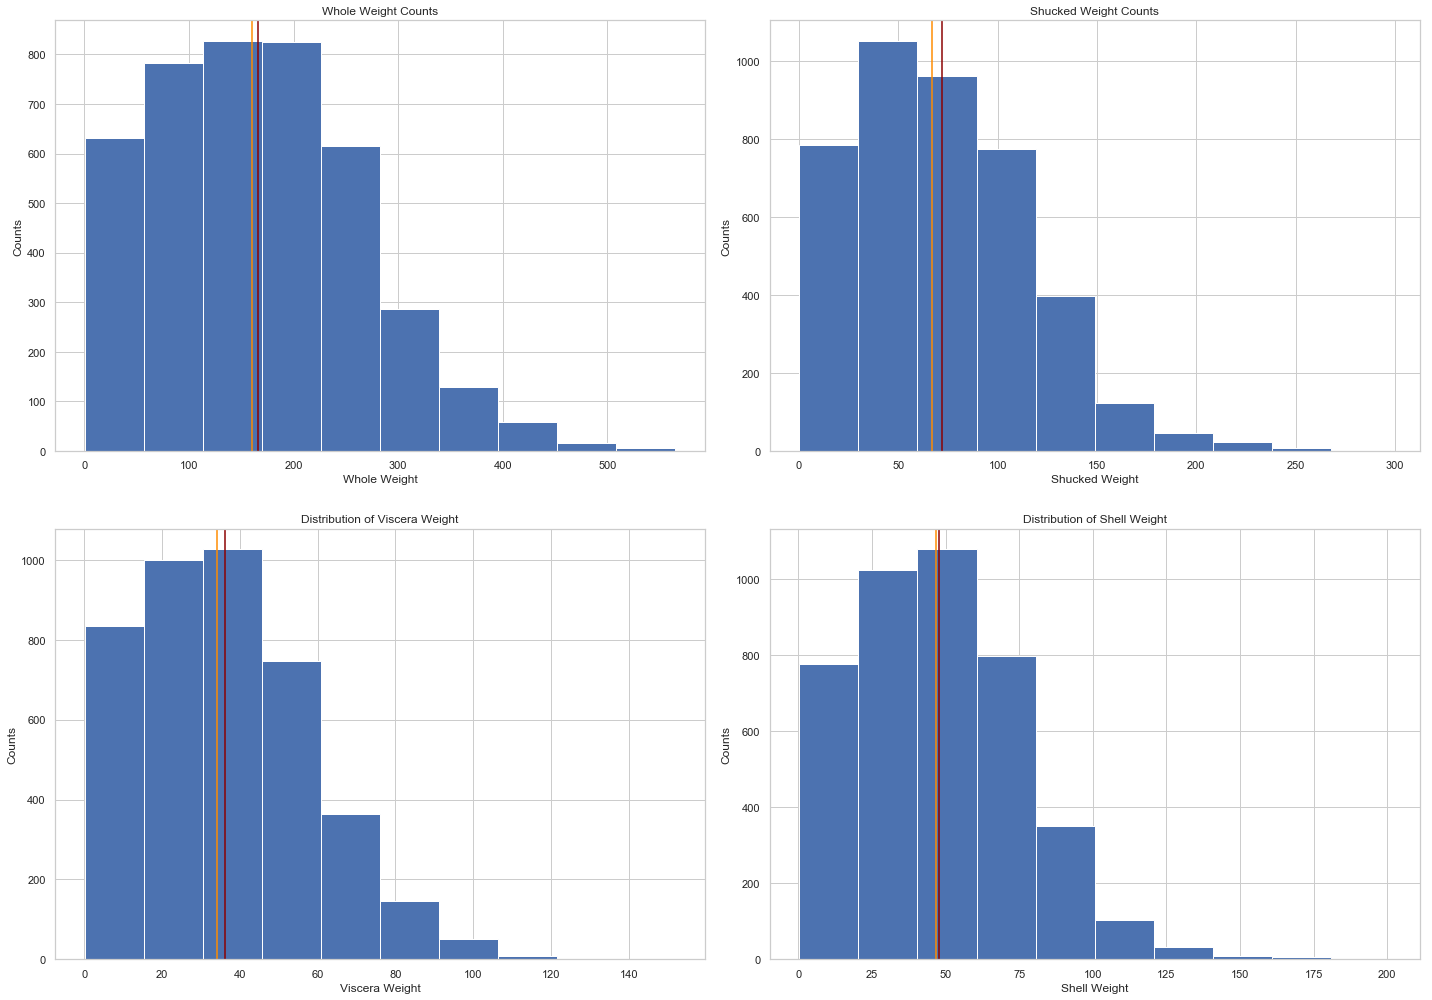

In [11]:
## Whole weight
x = range(len(whole_weight_counts))
width = 1/1.5
figure = plt.figure(figsize= (20,14))
axes = figure.add_subplot(2, 2, 1)
axes.hist(abalone['whole_weight'])
axes.axvline(np.mean(abalone['whole_weight']), color = 'DarkRed')
axes.axvline(np.median(abalone['whole_weight']), color = 'DarkOrange')
axes.set_title( "Whole Weight Counts")
axes.set_xlabel('Whole Weight')
axes.set_ylabel( "Counts")


## Shucked Weight
axes = figure.add_subplot(2, 2, 2)
axes.hist(abalone['shucked_weight'])
axes.axvline(np.mean(abalone['shucked_weight']), color = 'DarkRed')
axes.axvline(np.median(abalone['shucked_weight']), color = 'DarkOrange')
axes.set_title( "Shucked Weight Counts")
axes.set_xlabel('Shucked Weight')
axes.set_ylabel( "Counts")


## Viscera Weight                             
axes = figure.add_subplot(2, 2, 3)
axes.hist(abalone['viscera_weight'])
axes.axvline(np.mean(abalone['viscera_weight']), color = 'DarkRed')
axes.axvline(np.median(abalone['viscera_weight']), color = 'DarkOrange')
axes.set_title('Distribution of Viscera Weight')
axes.set_xlabel('Viscera Weight')
axes.set_ylabel('Counts')
                             
## Shell Weight                             
axes = figure.add_subplot(2, 2, 4)
axes.hist(abalone['shell_weight'])
axes.axvline(np.mean(abalone['shell_weight']), color = 'DarkRed')
axes.axvline(np.median(abalone['shell_weight']), color = 'DarkOrange')
axes.set_title('Distribution of Shell Weight')
axes.set_xlabel('Shell Weight')
axes.set_ylabel('Counts')

plt.tight_layout(h_pad=3)


All four graphs look left skewed and normally distributed. I won't do much with these variables since I don't see how they would help me with determining the age. The one that might be worth exploring a little more is whole weight since weight might be correlated to age, but I will stop the rest of EDA for the other weight variables here.

In [12]:
m1 = np.mean(abalone['whole_weight'])
std = np.std(abalone['whole_weight'])
var = np.var(abalone['whole_weight'])

print('The first moment is', m1)
print('The second moment is', var)

The first moment is 165.7484318889155
The second moment is 9616.95265794323


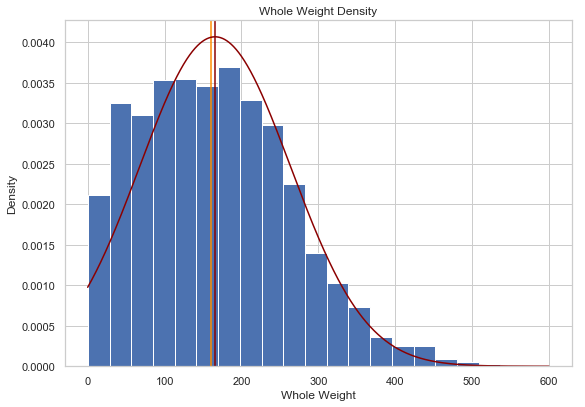

In [13]:
figure = plt.figure(figsize= (20,14))
axes = figure.add_subplot(2, 2, 1)
axes.hist(abalone['whole_weight'], bins = 20, density=True)
axes.axvline(np.mean(abalone['whole_weight']), color = 'DarkRed')
axes.axvline(np.median(abalone['whole_weight']), color = 'DarkOrange')
axes.set_title( "Whole Weight Density")
axes.set_xlabel('Whole Weight')
axes.set_ylabel("Density")
x = np.arange(0, 600, 0.01)
ys = stats.norm.pdf(x, m1, std)
axes.plot(x,ys,  color="darkred")
plt.show()

The data doesn't quite fit the normal distribution, so this is not a great model for this variable. We can try looking at the cumulative sum and see how if it still looks like a poor model for this. 

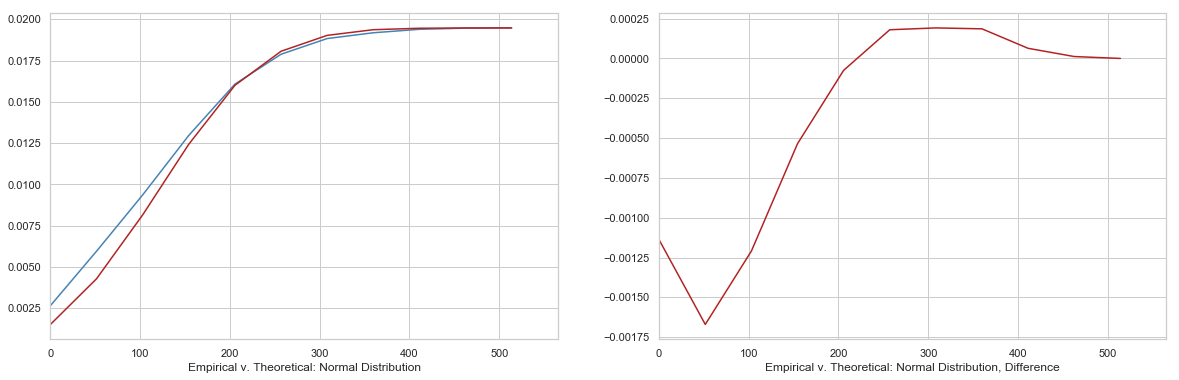

In [14]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram(abalone["whole_weight"], bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot( base[:-1], cumulative, color="steelblue")
axes.set_xlim((np.min(abalone[ "whole_weight"]), np.max( abalone[ "whole_weight"])))


sampled_data = [m1 + r * std for r in np.random.standard_normal(10000)]
values2, base = np.histogram( sampled_data, bins=base, density=True)
cumulative2 = np.cumsum( values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((np.min( abalone[ "whole_weight"]), np.max( abalone[ "whole_weight"])))
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")
axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot( base[:-1], differences, color='firebrick')
axes.set_xlim((np.min( abalone[ "whole_weight"]), np.max( abalone[ "whole_weight"])))
axes.hlines(0, 1500, 4000, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")
plt.show()

On the left graph we can the discrepancy is mainly in the lower values for weights but it is a pretty good fit for values over 200. 

The right graph we can see what the difference would be and we can see that a normal distribution would underestimate values under 200.  

In [15]:
length_counts = abalone.length.value_counts()
diameter_counts = abalone.diameter.value_counts()
heigth_counts = abalone.height.value_counts()
rings_counts = abalone.rings.value_counts()

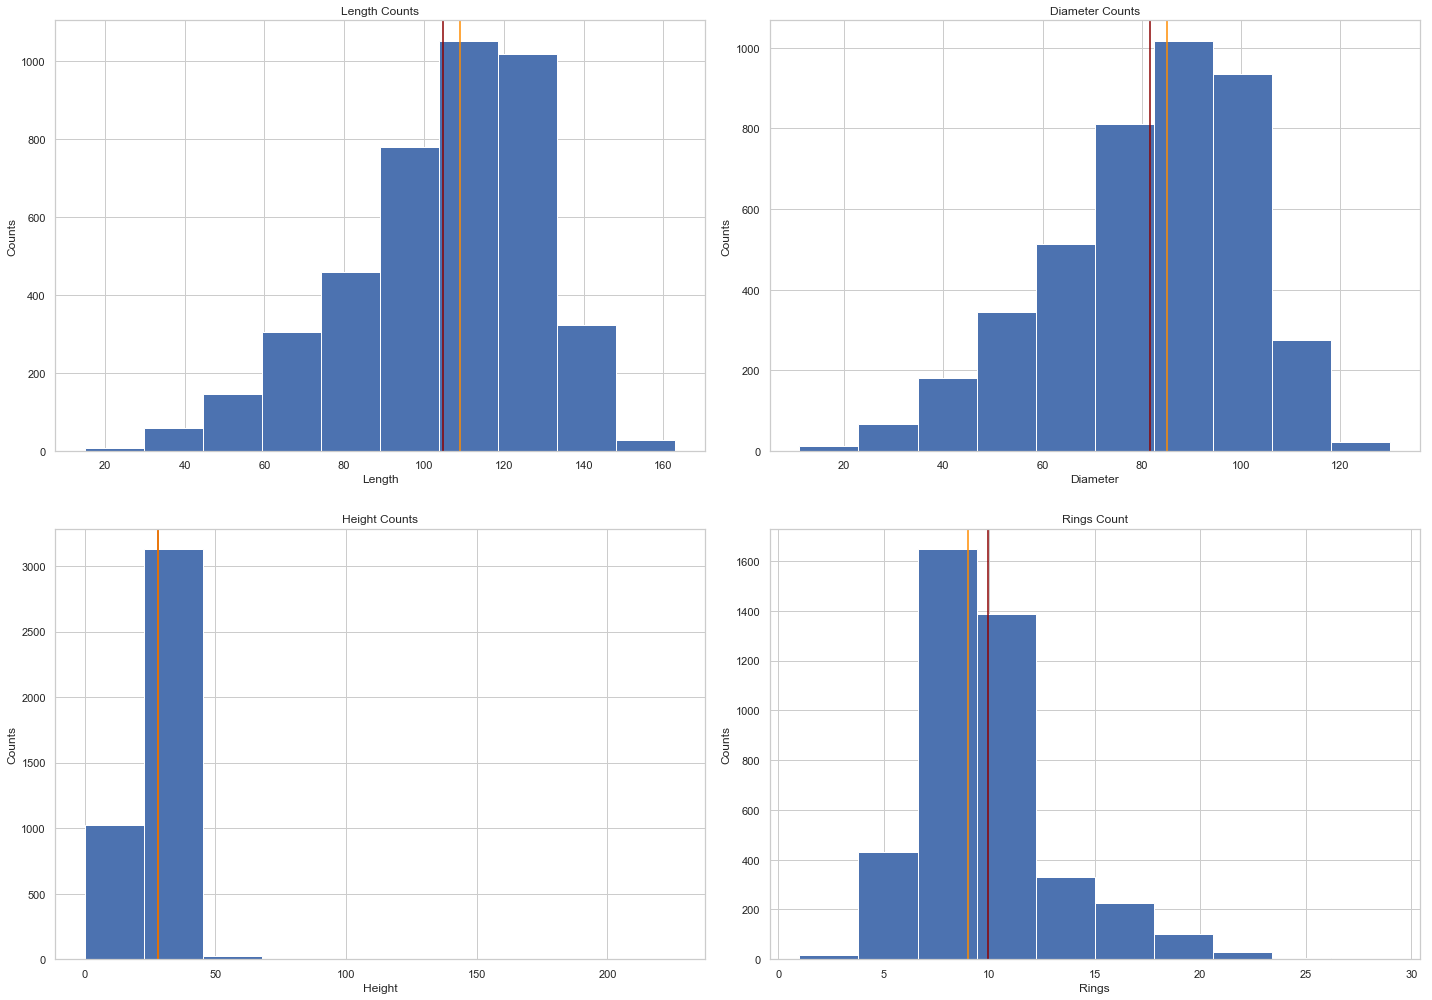

In [16]:
## Length

figure = plt.figure(figsize= (20,14))
axes = figure.add_subplot(2, 2, 1)
axes.hist(abalone['length'])
axes.axvline(np.mean(abalone['length']), color = 'DarkRed')
axes.axvline(np.median(abalone['length']), color = 'DarkOrange')
axes.set_title('Length Counts')
axes.set_xlabel('Length')
axes.set_ylabel("Counts")


## Diameter
axes = figure.add_subplot(2, 2, 2)
axes.hist(abalone['diameter'])
axes.axvline(np.mean(abalone['diameter']), color = 'DarkRed')
axes.axvline(np.median(abalone['diameter']), color = 'DarkOrange')
axes.set_title( "Diameter Counts")
axes.set_xlabel('Diameter')
axes.set_ylabel( "Counts")


## Height                             
axes = figure.add_subplot(2, 2, 3)
axes.hist(abalone['height'])
axes.axvline(np.mean(abalone['height']), color = 'DarkRed')
axes.axvline(np.median(abalone['height']), color = 'DarkOrange')
axes.set_title('Height Counts')
axes.set_xlabel('Height')
axes.set_ylabel('Counts')
                             
## Rings                             
axes = figure.add_subplot(2, 2, 4)
axes.hist(abalone['rings'])
axes.axvline(np.mean(abalone['rings']), color = 'DarkRed')
axes.axvline(np.median(abalone['rings']), color = 'DarkOrange')
axes.set_title('Rings Count')
axes.set_xlabel('Rings')
axes.set_ylabel('Counts')

plt.tight_layout(h_pad=3)


We can see that the mean(red) is larger than the median(orange) for the length and diameter variable, showing a positive skew.

A histogram doesn't work very well for the height variable, so I'll try a box plot instead.

The median is larger than the mean for the rings variable, showing a negative skew.

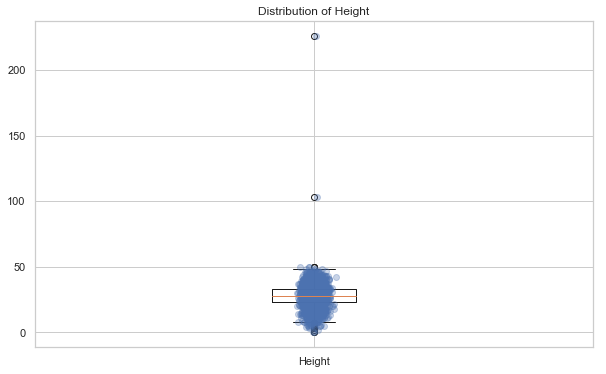

In [17]:
figure = plt.figure(figsize= (10, 6))
axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(abalone['height'], labels=["Height"], patch_artist=False)
x = np.random.normal(1, 0.01, size=len(abalone['height']))
axes.plot(x, abalone['height'], 'o', alpha=0.3)
axes.set_title('Distribution of Height')
plt.show()

This graph helps more than I expected since it shows 2 very extreme values, so I'll try again removing those extreme values.

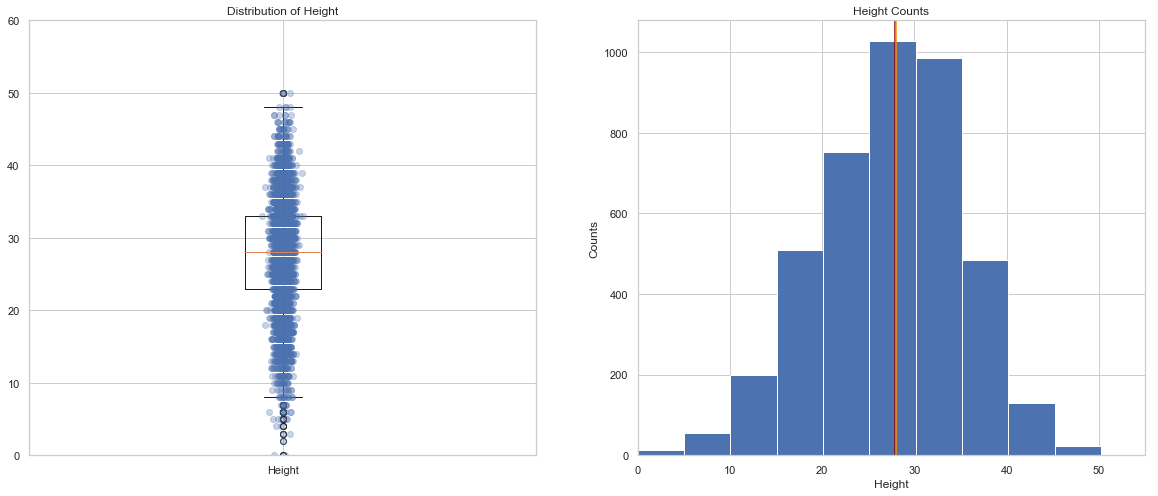

In [18]:
figure = plt.figure(figsize= (20, 8))
axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot(abalone['height'], labels=["Height"], patch_artist=False)
x = np.random.normal(1, 0.01, size=len(abalone['height']))
axes.plot(x, abalone['height'], 'o', alpha=0.3)
axes.set_ylim(0,60)
axes.set_title('Distribution of Height')

bins = int(round((max(abalone['height'])-min(abalone['height']))/5))
axes = figure.add_subplot(1,2,2)
axes.hist(abalone['height'], bins = bins)
axes.axvline(np.mean(abalone['height']), color = 'DarkRed')
axes.axvline(np.median(abalone['height']), color = 'DarkOrange')
axes.set_xlim(0,55)
axes.set_title('Height Counts')
axes.set_xlabel('Height')
axes.set_ylabel('Counts')
plt.show()

If we omit the 2 extreme values, then we see that the variable height shows that a normal distribution might be a fit for this variable.

Now let's look at the rings variable a little bit since this is the one that would give the age. Adjusting the bin size might resemble a normal distribution a little bit better. 

29


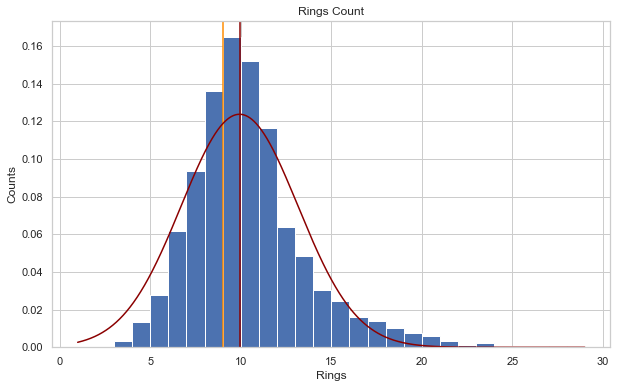

In [19]:
## Rings 
print(max(abalone['rings']))
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone['rings'], bins = 28, density=True)
axes.axvline(np.mean(abalone['rings']), color = 'DarkRed')
axes.axvline(np.median(abalone['rings']), color = 'DarkOrange')
axes.set_title('Rings Count')
axes.set_xlabel('Rings')
axes.set_ylabel('Counts')
x = np.arange(1, 29, 0.01)
ys = stats.norm.pdf(x, np.mean(abalone['rings']), np.std(abalone['rings']))
axes.plot(x,ys,  color="darkred")

plt.show()

A normal distribution might not be the best fit since we can see that it might underestimate values greater than 15 and values between 8 and 12, as well as overestimate values under 6. 

I will plot the cumulative sums but we can see from the above graph that it wouldn't be a fit, so I expect the line for the difference to be nowhere near zero

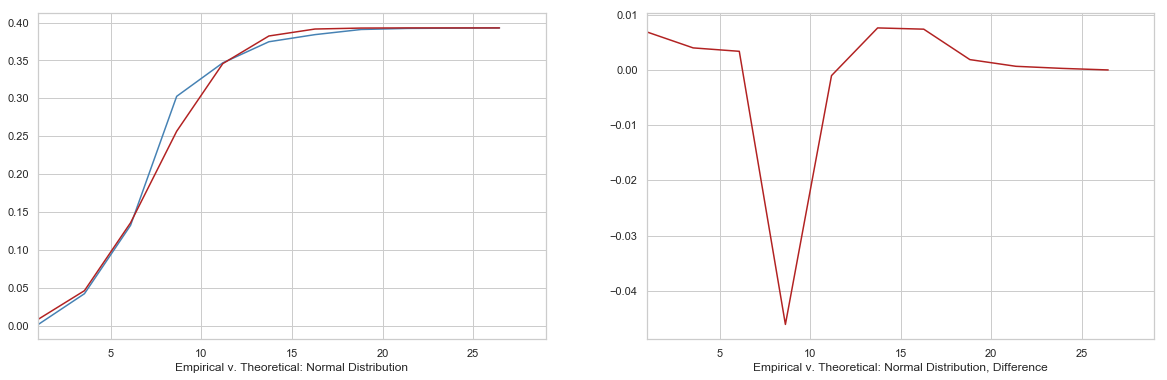

In [20]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram(abalone["rings"], bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot( base[:-1], cumulative, color="steelblue")
axes.set_xlim((np.min(abalone[ "rings"]), np.max( abalone[ "rings"])))


sampled_data = [np.mean(abalone['rings']) + r * np.std(abalone['rings']) for r in np.random.standard_normal(10000)]
values2, base = np.histogram( sampled_data, bins=base, density=True)
cumulative2 = np.cumsum( values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((np.min( abalone[ "rings"]), np.max( abalone[ "rings"])))
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")
axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot( base[:-1], differences, color='firebrick')
axes.set_xlim((np.min( abalone[ "rings"]), np.max( abalone[ "rings"])))
axes.hlines(0, 1500, 4000, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")
plt.show()

The left graph doesn't look too bad, so a normal distribution might not be a bad choice if I am looking at only this graph. However, as expected the right graph showing the difference has very few values close to zero. The most notable difference is between 5 and 11(approx). 

A normal distribution would not be a good choice for this variable.

### Bivariate

For the bivariate EDA, I am going to concentrate on the rings variable with whole weight, height, diameter, length and sex. The main reason for exploring it with sex is because infants are included in this variable. If the sex variable only included Male and Female, then it wouldn't be worth exploring it.  

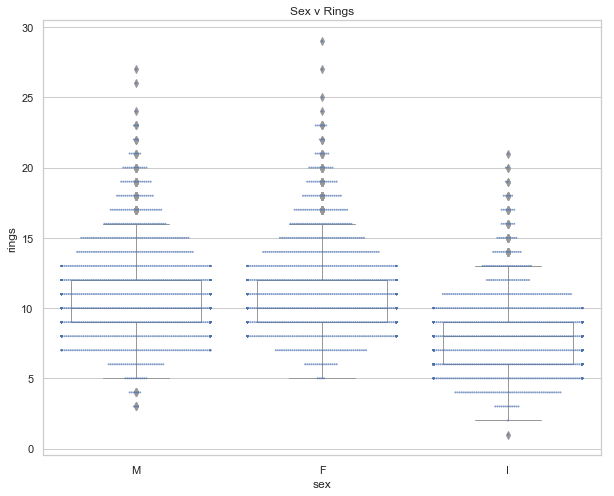

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'sex', y = 'rings', data = abalone, color = 'w', width = 0.7, linewidth = 1)
sns.swarmplot(x = 'sex', y = 'rings', data = abalone, color = 'b', size =2, alpha = 0.7)
plt.title('Sex v Rings')
plt.show()

As suspected, there is no clear visual on the difference between male and female but we can see the difference in the number of rings between an adult and an infant. I'll try a histogram next

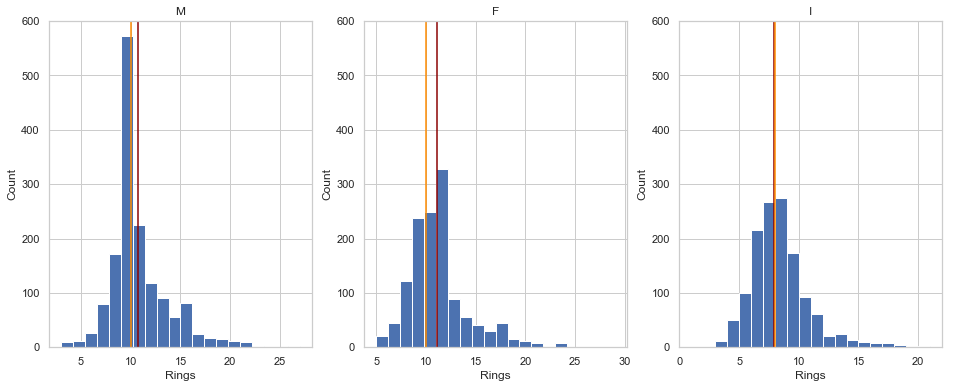

In [22]:
grouped = abalone.groupby("sex")
sex_group = grouped["rings"].describe()
sex = pd.unique(abalone['sex'].values)
figure = plt.figure(figsize=(16,6))
for i, j in enumerate(sex):
    axes = figure.add_subplot(1, 3, i+1)
    data = grouped['rings'].get_group(j).values
    axes.hist(data, bins = 20)
    axes.axvline(np.mean(data), color = 'DarkRed')
    axes.axvline(np.median(data), color = 'DarkOrange')

    axes.set_title(j)
    axes.set_xlabel('Rings')
    axes.set_ylabel('Count')
    axes.set_ylim(0,600)
plt.show()

From these two graphs, it would be tough to differentiate infants from adults by just looking at the number of rings. We can  deduct that female abalone have at least 5 rings. The distributions for M and F, look skewed to the right. The distribution for I, might be normal. 

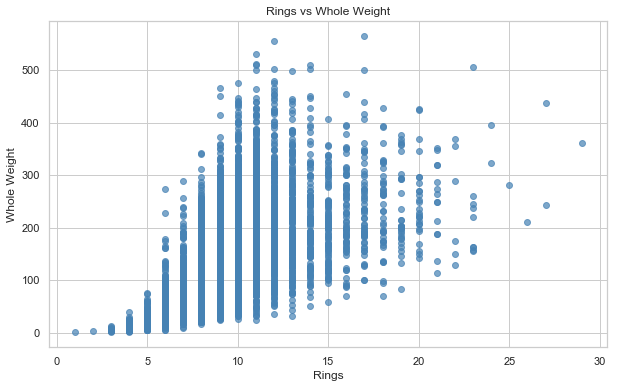

In [23]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(abalone["rings"], abalone["whole_weight"], marker="o", color="steelblue", alpha=0.7)
axes.set_title('Rings vs Whole Weight')
axes.set_xlabel('Rings')
axes.set_ylabel('Whole Weight')
plt.show()

The graph is not very helpful since there is no clear relationship between weight and number of rings. What if we add the sex variable? We should be able to see the difference between adults and infants more clearly. 

<Figure size 1440x576 with 0 Axes>

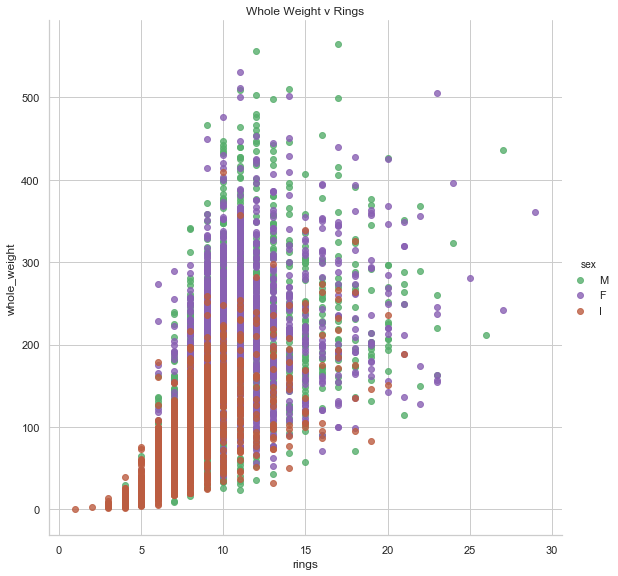

In [24]:
figure = plt.figure(figsize=(20, 8))
axes = sns.lmplot(x = 'rings', y='whole_weight', data = abalone, hue='sex', fit_reg=False, height=8,
palette = dict(M = '#56ae6c', F = '#8960b3', I = '#bc5d41'))
plt.title('Whole Weight v Rings')
plt.show()

We can see that infants are concentrated at the bottom right. Males and Females are pretty mixed but we can definitely see the difference between M, F and I. 

In [25]:
print( "r =", stats.pearsonr(abalone["whole_weight"], abalone["rings"])[0])

r = 0.5403896769239007


There is some correlation and since it is slightly more than 0.5, it makes it somewhat interesting. 

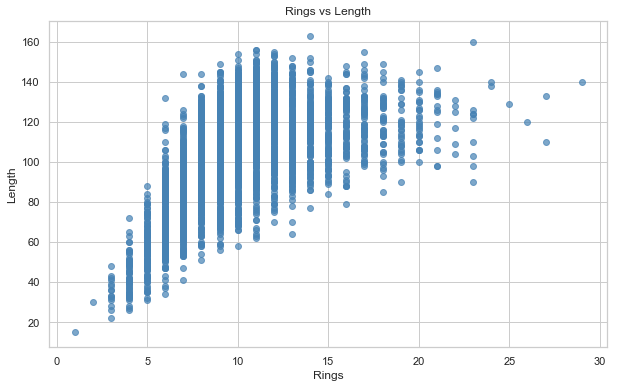

In [26]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(abalone["rings"], abalone["length"], marker="o", color="steelblue", alpha=0.7)
axes.set_title('Rings vs Length')
axes.set_xlabel('Rings')
axes.set_ylabel('Length')
plt.show()

I think adding the third variable (sex) gives a lot more information to these graphs, so I'll do this for the rest of the scatterplots. 

<Figure size 1440x576 with 0 Axes>

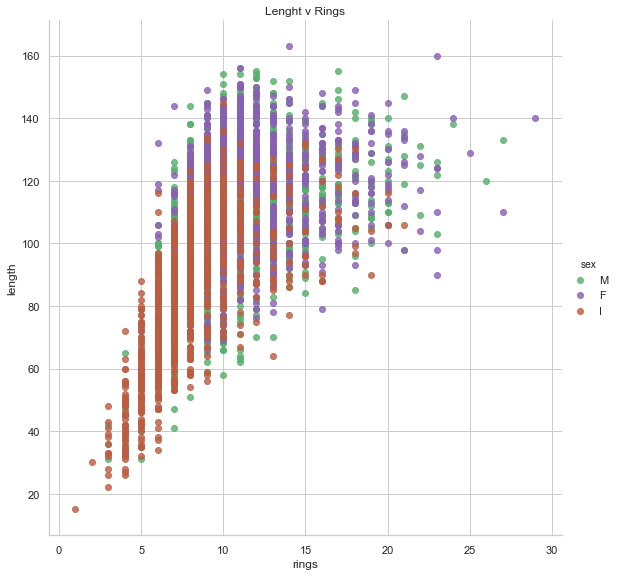

In [27]:
figure = plt.figure(figsize=(20, 8))
axes = sns.lmplot(x = 'rings', y='length', data = abalone, hue='sex', fit_reg=False, height=8,
palette = dict(M = '#56ae6c', F = '#8960b3', I = '#bc5d41'))
plt.title('Lenght v Rings')
plt.show()

In [28]:
print( "r =", stats.pearsonr(abalone["length"], abalone["rings"])[0])

r = 0.5567195769296179


There is some correlation and we can see from the graph that the distribution of infant's length is not that much different from adults. 

The same as the previous graph, infants are mainly to the left but the length is not that much different from adults. 

I am now expecting the same results from the height and diameter, but I am still going to plot them in case I find something interesting. 

<Figure size 1440x576 with 0 Axes>

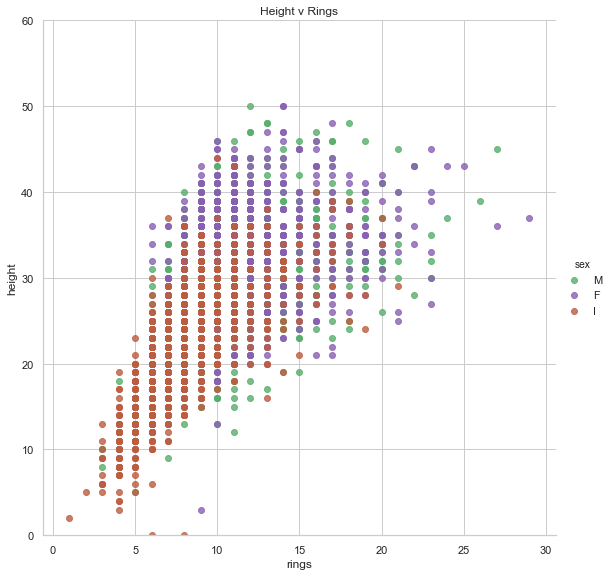

In [29]:
figure = plt.figure(figsize=(20, 8))
axes = sns.lmplot(x = 'rings', y='height', data = abalone, hue='sex', fit_reg=False, height=8,
palette = dict(M = '#56ae6c', F = '#8960b3', I = '#bc5d41'))
axes.set(ylim=(0,60))
plt.title('Height v Rings')
plt.show()

In [30]:
print( "r =", stats.pearsonr(abalone["height"], abalone["rings"])[0])

r = 0.5574673244580375


There is a very large, Female and one very large Male so I removed them from the graph to get a much a better visual of the data in this variable. The correlation is very similar as previous variables, somewhat interesting. 

<Figure size 1440x576 with 0 Axes>

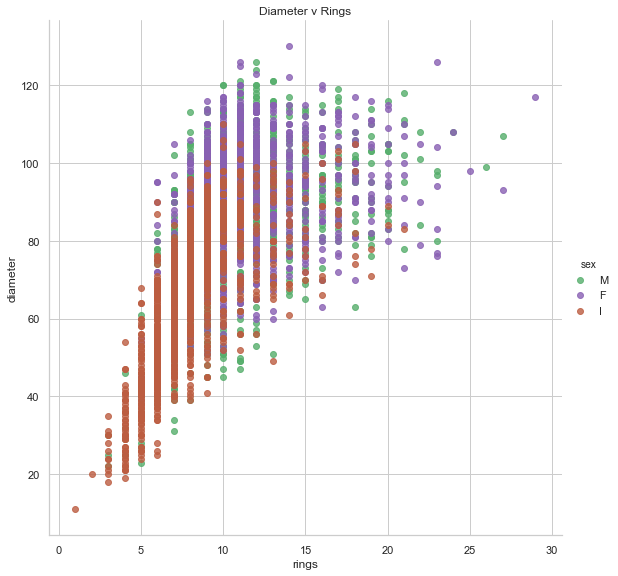

In [31]:
figure = plt.figure(figsize=(20, 8))
axes = sns.lmplot(x = 'rings', y='diameter', data = abalone, hue='sex', fit_reg=False, height=8,
palette = dict(M = '#56ae6c', F = '#8960b3', I = '#bc5d41'))
plt.title('Diameter v Rings')
plt.show()

In [32]:
print( "r =", stats.pearsonr(abalone["diameter"], abalone["rings"])[0])

r = 0.5746598513059192


The correlation is slightly higher than the previous variables, making it a little bit more interesting. 

Because I am curious to see the distribution of age even though I expect to see something very similar to the distribution of rings, I am going to plot the histogram for age and create age = rings + 1.5

In [33]:
age = [x + 1.5 for x in abalone['rings']]
np.mean(age)

11.433684462532918

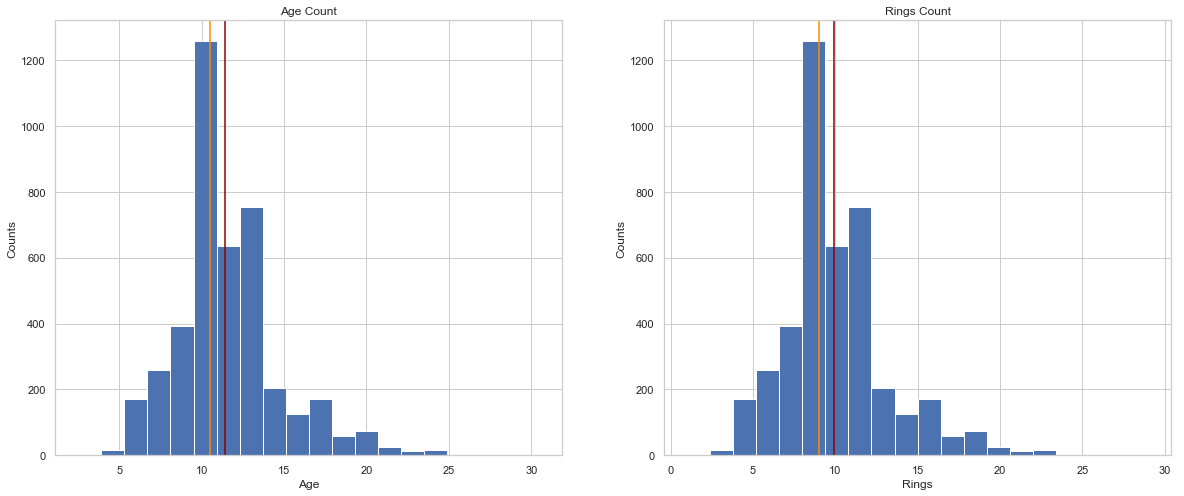

In [34]:
figure = plt.figure(figsize=(20, 8))
axes = figure.add_subplot(1, 2, 1)
axes.hist(age, bins = 20)
axes.axvline(np.mean(age), color = 'DarkRed')
axes.axvline(np.median(age), color = 'DarkOrange')
axes.set_title('Age Count')
axes.set_xlabel('Age')
axes.set_ylabel('Counts')

axes = figure.add_subplot(1, 2, 2)
axes.hist(abalone['rings'], bins = 20)
axes.axvline(np.mean(abalone['rings']), color = 'DarkRed')
axes.axvline(np.median(abalone['rings']), color = 'DarkOrange')
axes.set_title('Rings Count')
axes.set_xlabel('Rings')
axes.set_ylabel('Counts')
plt.show()

No surprises. Exactly what I expected to see. 

### Summary

I didn't find any variables particularly helpful on determining the age of the abalone, with the exception of rings mainly because it was provided in description that this would help determine age. 

Plotting three variables wasn't as helpful as I thought it would be to determine if any other variable would help determine age. I found that weight, height, length and diameter all have a big range for infants and there wasn't a notable difference between adults and infants.

It might require a more advanced statistical technique to determine age from the other variables. 